In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv("TSLA.csv")

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [10]:
dataset['Date']=pd.to_datetime(dataset.Date)

In [11]:
dataset.shape

(2416, 7)

In [12]:
dataset.drop('Adj Close',axis=1,inplace=True)

In [14]:
dataset.tail()

,Date,Open,High,Low,Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,47065000


In [15]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2416 non-null   datetime64[ns]
 1   Open    2416 non-null   float64       
 2   High    2416 non-null   float64       
 3   Low     2416 non-null   float64       
 4   Close   2416 non-null   float64       
 5   Volume  2416 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.4 KB


In [17]:
dataset.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [18]:
print(len(dataset))

2416


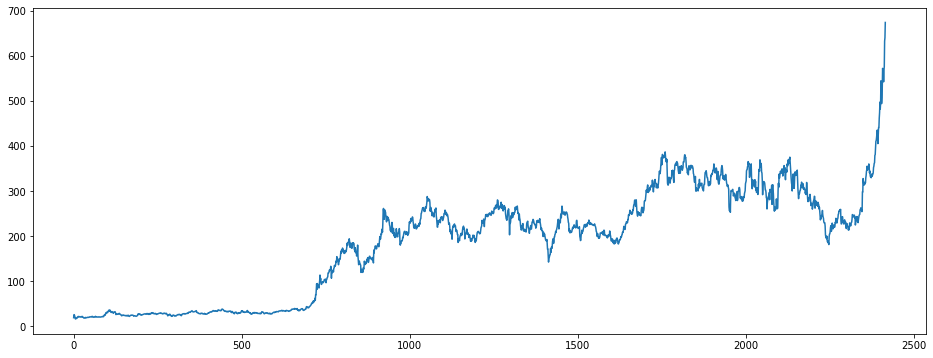

In [20]:
dataset['Open'].plot(figsize=(16,6))

In [21]:
x=dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)

In [23]:
X_train.shape

(1812, 4)

In [24]:
X_test.shape

(604, 4)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [29]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regressor.coef_

array([-6.39634305e-01,  9.11543017e-01,  7.26604894e-01, -1.55475447e-08])

In [32]:
pred=regressor.predict(X_test)

In [33]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
...          ...         ...         ...       ...
1636  214.880005  222.250000  214.419998   5915700
1948  307.339996  307.589996  291.359985   8375200
2348  297.720001  330.000000  296.109985  30006100
1190  198.500000  200.500000  197.470001   2631600
359    32.490002   33.070000   31.629999    591100

[604 rows x 4 columns]


In [34]:
pred.shape

(604,)

In [38]:
df=pd.DataFrame(Y_test,pred)

In [39]:
dfr=pd.DataFrame({'Actual Price': Y_test,'Predicted Price':pred})

In [40]:
dfr

,Actual Price,Predicted Price
966,207.729996,211.941303
557,28.280001,28.325464
148,24.010000,23.943206
1917,315.230011,326.556359
1585,200.240005,197.958571
...,...,...
1636,219.529999,220.790009
1948,304.179993,295.307237
2348,328.130005,325.003264
1190,199.630005,199.176271


In [44]:
regressor.score(X_test,Y_test)*100

99.96847995136963

In [45]:
import math

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,pred))

Mean Absolute Error: 1.3958905895674953


In [48]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,pred))

Mean Squared Error: 4.421255297596044


In [49]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(Y_test,pred)))

Root Mean Squared Error: 2.1026781250576714


In [55]:
g=dfr.head(20)

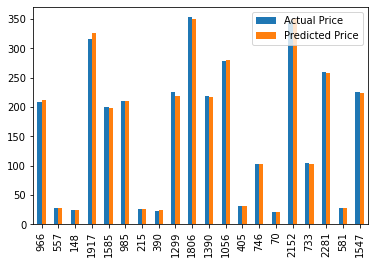

In [56]:
g.plot(kind='bar')